# Team Heart_Bits: Heart Disease Analysis

## About the Dataset

This dataset contains 13 features related to heart disease.  
The goal is to classify the target variable (**disease / no disease**) using various machine learning algorithms and identify the most suitable one.

### Attribute Information

- **Age** - Age in years  
- **Sex** - 1 = Male; 0 = Female  
- **CP** - Chest pain type  
- **TRESTBPS** - Resting blood pressure (in mm Hg on admission to the hospital)  
- **CHOL** - Serum cholesterol in mg/dl  
- **FBS** - Fasting blood sugar > 120 mg/dl (1 = True; 0 = False)  
- **RESTECH** - Resting electrocardiographic results  
- **THALACH** - Maximum heart rate achieved  
- **EXANG** - Exercise induced angina (1 = Yes; 0 = No)  
- **OLDPEAK** - ST depression induced by exercise relative to rest  
- **SLOPE** - Slope of the peak exercise ST segment  
- **CA** - Number of major vessels (0–3) colored by fluoroscopy  
- **THAL** - Thalassemia type 3 = Normal; 6 = Fixed defect; 7 = Reversible defect  
- **TARGET** - 1 = Disease; 0 = No disease


In [ ]:
### STEP 1: Importing the Libraries needed


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving heart (1).csv to heart (1).csv


In [ ]:
### STEP 2: Loading the Dataset

heart_bits = pd.read_csv(r"heart (1).csv")

heart_bits.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Checking shape of dataset

heart_bits.shape

(1025, 14)

In [ ]:
# Checking data Types and Info

heart_bits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# Checking for missing values

heart_bits.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
##Statistical summary

heart_bits.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### **Statistical Summary of the Dataset**

The table above presents a statistical summary of all the numerical features in our dataset. It provides insights into the distribution, spread, and central tendencies of each variable, helping us understand the overall data characteristics before any modeling or visualization.

### **Key Statistical Metrics**
- Count: Number of non-missing observations for each feature.  
- Mean: Average value of each column, showing the central tendency.  
- Std (Standard Deviation): Measures how spread out the data is - higher values indicate more variability.  
- Min & Max: The smallest and largest observed values, revealing the data range.  
- 25%, 50%, 75% (Quartiles): Show the spread and distribution - 50% represents the median value.

### **Observations**
- The average age of participants is around 54 years, ranging from 29 to 77.  
- Cholesterol (`chol`) and resting blood pressure (`trestbps`) show notable variation, indicating different cardiovascular profiles.  
- Sex is encoded as `0` (female) and `1` (male), with males being the majority in the dataset.  
- The target variable has a near-even split between `0` (no heart disease) and `1` (presence of heart disease), making it balanced for classification tasks.  
- Features like `cp` (chest pain type), `thalach` (maximum heart rate achieved), and `oldpeak` (ST depression) exhibit meaningful differences that may contribute strongly to model predictions.

### **Why This Step Matters**
Understanding these basic statistics helps:
- Detect data imbalance or missing values early.  
- Identify potential outliers or unusual ranges.  
- Guide feature scaling and transformation decisions before model training.


### Exploratory Data Analysis (EDA)


In [ ]:
# Step1. Check Target Variable (Heart Disease Cases)

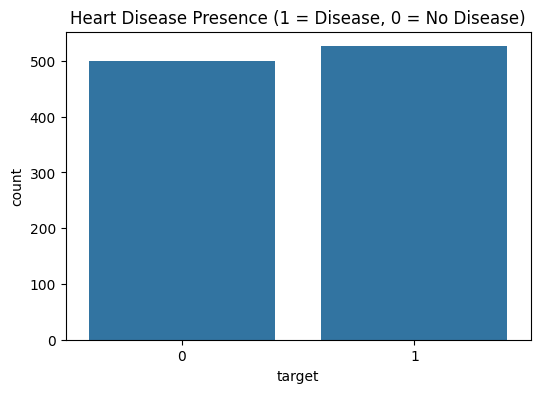

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=heart_bits)
plt.title("Heart Disease Presence (1 = Disease, 0 = No Disease)")
plt.show()


In [ ]:
#Step2. Check the  Percentage

heart_rate = heart_bits['target'].value_counts(normalize=True) * 100

heart_rate

,proportion
target,
1,51.317073
0,48.682927


### Target Variable Distribution

The bar plot shows the proportion of patients with and without heart disease.  

- 51.3% of the individuals are diagnosed with heart disease (target = 1).  
- 48.7% have no heart disease (target = 0).  

This indicates a fairly balanced dataset, which is ideal for building reliable classification models.


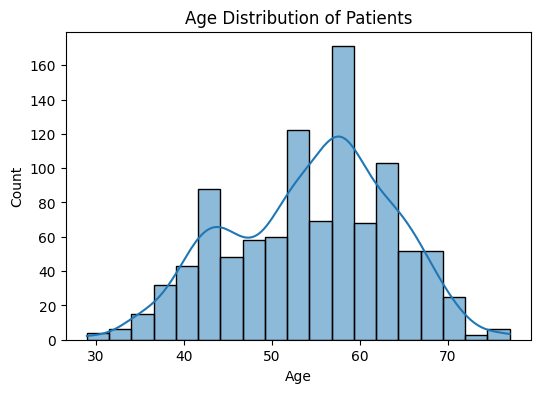

In [ ]:
##Step3. Check the age variable

plt.figure(figsize=(6,4))
sns.histplot(heart_bits['age'], kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.show()

### Age Distribution of Patients
The histogram above shows that most patients fall between 45 and 65 years old, with the peak around 55 years.  
This indicates that middle-aged individuals are more frequently represented in the dataset, suggesting they are more prone to heart disease risk.

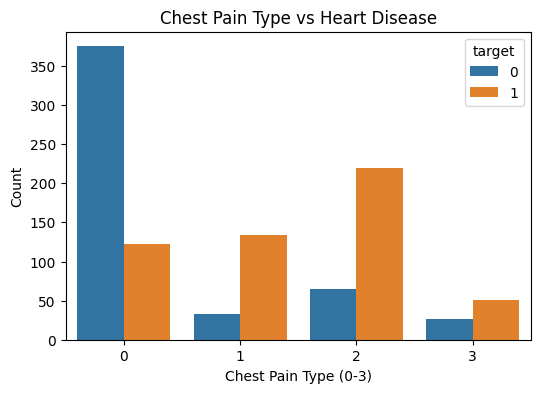

In [ ]:
##Step4. Check  Chest pain vs Heart Diseases


plt.figure(figsize=(6,4))
sns.countplot(x='cp', hue='target', data=heart_bits)
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type (0-3)")
plt.ylabel("Count")
plt.show()


### Chest Pain Type vs Heart Disease
The bar plot compares different chest pain types (cp: 0–3) with heart disease presence (target).  
- Patients with type 0 chest pain (typical angina) mostly do not have heart disease.  
- However, types 2 and 3 (non-anginal and asymptomatic) are more associated with heart disease cases.  

This shows a strong relationship between chest pain type and heart disease likelihood.

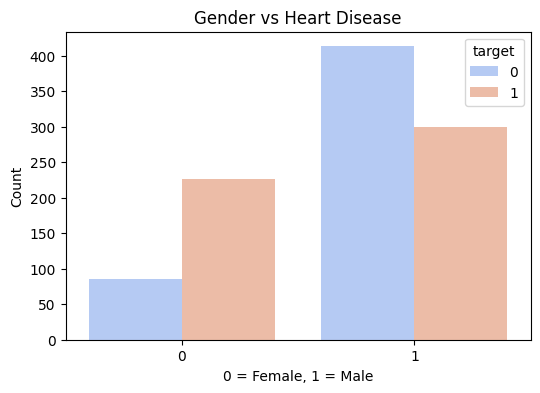

In [ ]:
##Step5. Check Gender vs Heart Disease

plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='target', data=heart_bits, palette='coolwarm')
plt.title('Gender vs Heart Disease')
plt.xlabel('0 = Female, 1 = Male')
plt.ylabel('Count')
plt.show()

### Gender vs Heart Disease Findings:
The bar chart shows the number of individuals with and without heart disease (`target`: 1 = disease, 0 = no disease) across genders (`0` = Female, `1` = Male).  
There are more males overall, and males show a higher rate of heart disease compared to females.

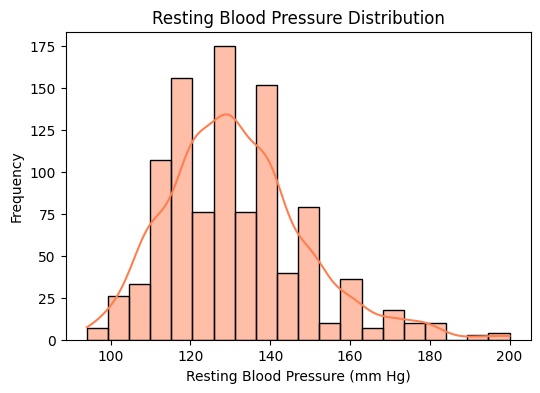

In [ ]:
###Step6. Check  Resting Blood Pressure
plt.figure(figsize=(6,4))
sns.histplot(heart_bits['trestbps'], bins=20, kde=True, color='coral')
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.show()

### Resting Blood Pressure Distribution Findings:
The histogram illustrates resting blood pressure (`mm Hg`) distribution, roughly bell-shaped with a slight right skew.  
Most values cluster between **120–130 mm Hg**, indicating that most individuals have normal or slightly elevated blood pressure.

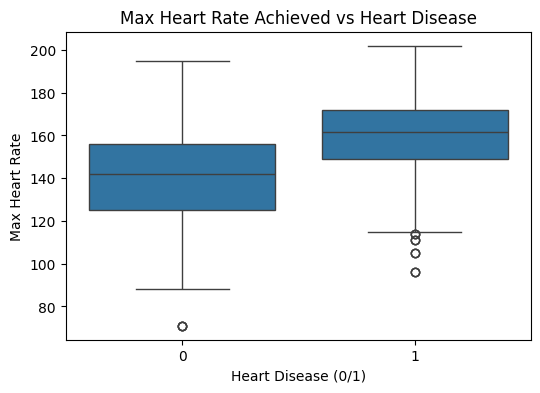

In [ ]:
###Step7. Check Maximum Heart rate vs Disease

plt.figure(figsize=(6,4))
sns.boxplot(x='target', y='thalach', data=heart_bits)
plt.title("Max Heart Rate Achieved vs Heart Disease")
plt.xlabel("Heart Disease (0/1)")
plt.ylabel("Max Heart Rate")
plt.show()


## Max Heart Rate vs Heart Disease Findings:  
This box plot compares maximum heart rate achieved for individuals with (`1`) and without (`0`) heart disease.  
Those with heart disease tend to have a higher median heart rate (160–170 bpm)than those without (**140–150 bpm**).  
In this dataset, higher max heart rate is unexpectedly linked to heart disease.

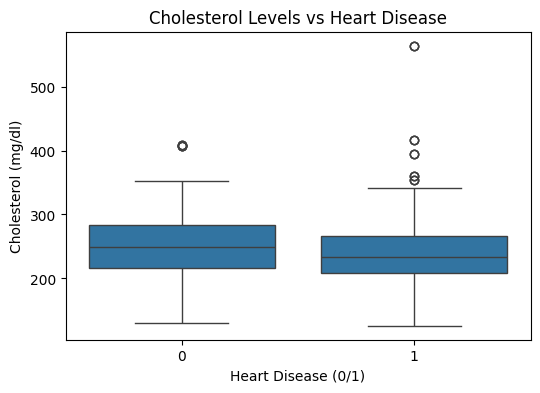

In [ ]:
#Step8. Check Cholesterol vs Heart disease


plt.figure(figsize=(6,4))
sns.boxplot(x='target', y='chol', data=heart_bits)
plt.title("Cholesterol Levels vs Heart Disease")
plt.xlabel("Heart Disease (0/1)")
plt.ylabel("Cholesterol (mg/dl)")
plt.show()


### Cholesterol Levels vs Heart Disease Finding:
This box plot shows cholesterol levels (mg/dl) for individuals with (`1`) and without (`0`) heart disease.  
Both groups have similar medians (~240–250 mg/dl) and similar variability, with some high-value outliers above 400–500 mg/dl.  
No major difference in cholesterol levels between the two groups.

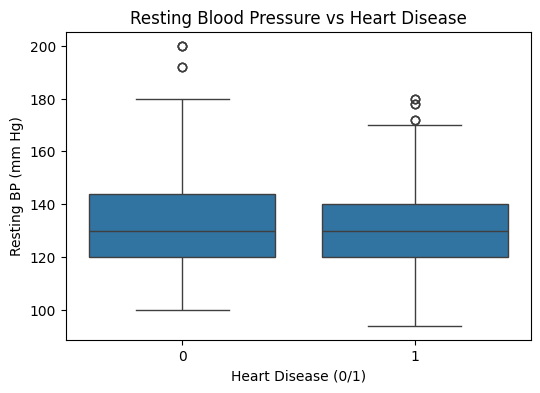

In [ ]:
##Step9. Check Resting blood pressure vs Heart disease

plt.figure(figsize=(6,4))
sns.boxplot(x='target', y='trestbps', data=heart_bits)
plt.title("Resting Blood Pressure vs Heart Disease")
plt.xlabel("Heart Disease (0/1)")
plt.ylabel("Resting BP (mm Hg)")
plt.show()


### Resting Blood Pressure vs Heart Disease Finding:
This box plot compares resting blood pressure (mm Hg) for individuals with (`1`) and without (`0`) heart disease.  
Both groups have a similar median (~130 mm Hg) and comparable variability, with some outliers near 200 mm Hg.  
Resting blood pressure alone doesn’t strongly distinguish between heart disease and non-disease cases in this dataset.


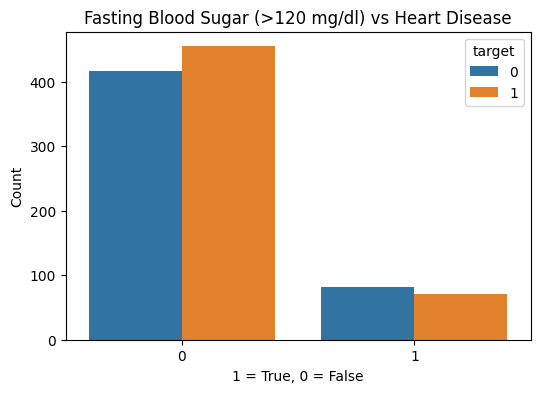

In [ ]:
##Step10. Check Fasting blood sugar vs Heart disease

plt.figure(figsize=(6,4))
sns.countplot(x='fbs', hue='target', data=heart_bits)
plt.title("Fasting Blood Sugar (>120 mg/dl) vs Heart Disease")
plt.xlabel("1 = True, 0 = False")
plt.ylabel("Count")
plt.show()


### Fasting Blood Sugar (>120 mg/dl) vs Heart Disease Finding
Most individuals have fasting blood sugar ≤120 mg/dl (0), and within this group, slightly more people have heart disease (1) than not.  
Fasting blood sugar isn’t a strong predictor of heart disease due to the large imbalance in category counts.

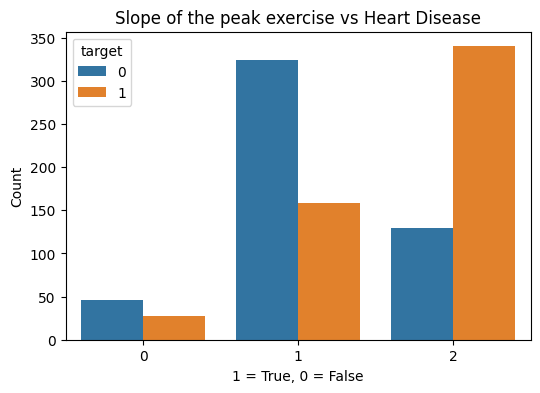

In [ ]:
##Step11. Check the Slope of ST vs Heart disease

plt.figure(figsize=(6,4))
sns.countplot(x='slope', hue='target', data=heart_bits)
plt.title("Slope of the peak exercise vs Heart Disease")
plt.xlabel("1 = True, 0 = False")
plt.ylabel("Count")
plt.show()


### Slope of the Peak Exercise ST Segment vs Heart Disease  
This chart compares heart disease presence across ST segment slope types:  
- Upsloping (0): Few cases overall.  
- Flat (1): Common in those without heart disease (0).  
- Downsloping (2): Common in those with heart disease (1).  
ST slope is a strong indicator - flat slopes align with healthy hearts, while downsloping patterns are linked to heart disease.

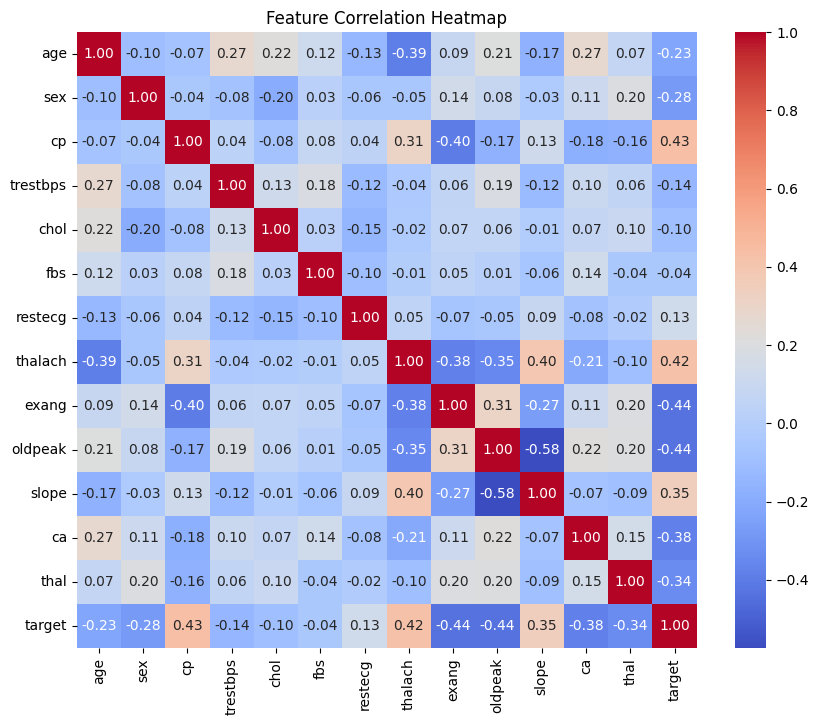

In [ ]:
#Step12. Check the  Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(heart_bits.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

### Feature Correlation Heatmap Findings:
This heatmap shows how strongly each feature relates to others using **Pearson’s correlation (R)** — red = positive, blue = negative.

**Key Insights (Target vs. Features)**  
- **Positively correlated with heart disease:**  
  - `cp` (Chest Pain Type) → 0.43  
  - `exang` (Exercise Induced Angina) → 0.44  
  - `oldpeak` (ST Depression) → 0.43  
  - `ca` (Major Vessels) → 0.39  
  - `thal` (Thalassemia) → 0.34  

- **Negatively correlated with heart disease:**  
  - `thalach` (Max Heart Rate) → -0.42  
  - `slope` (ST Slope) → -0.34  
  - `sex` (Gender) → -0.28  

- **Weak or no correlation:**  
  - `fbs` (Fasting Blood Sugar) and `chol` (Cholesterol) → very weak impact.  

**Interpretation:** Chest pain, exercise-related features, and heart rate show the strongest linear relationships with heart disease.


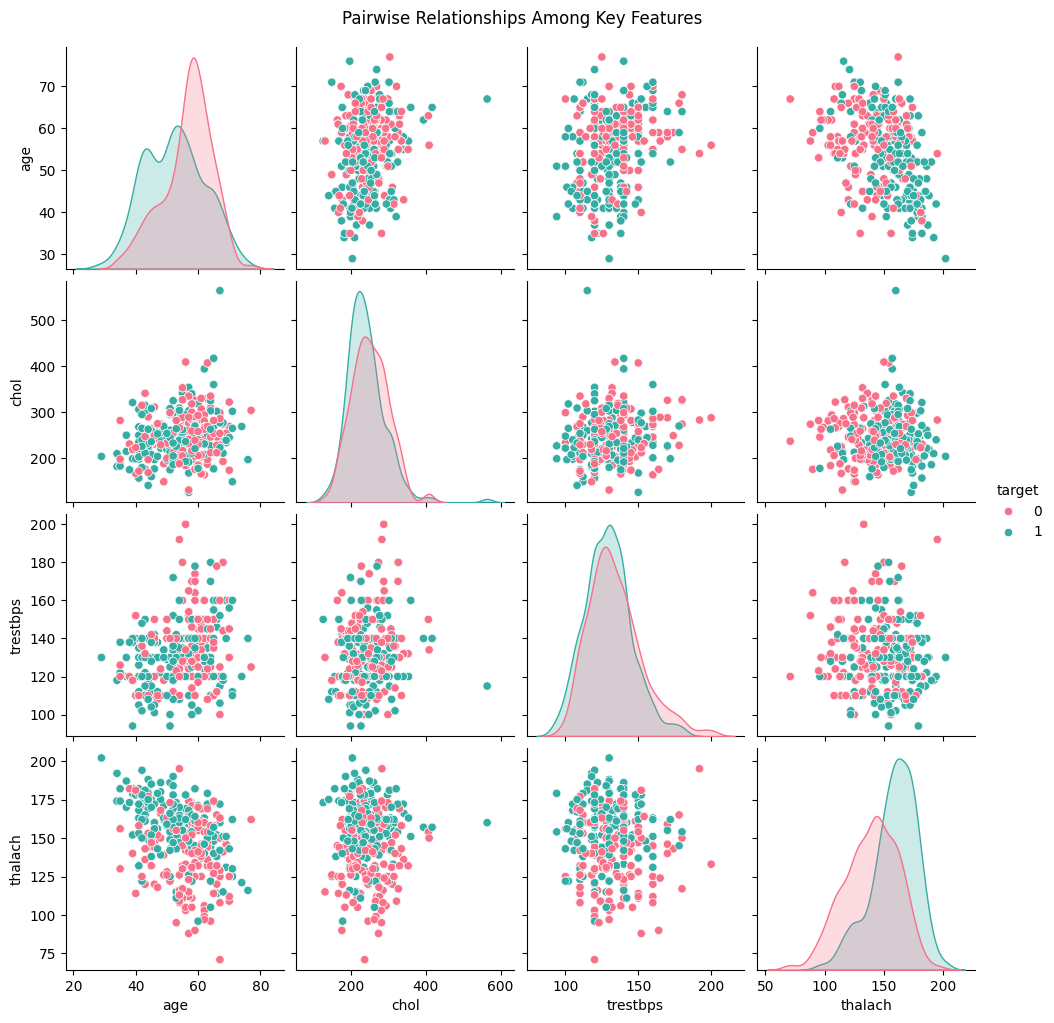

In [ ]:
#Step13. Check the Pairplot of Selected Features
selected_features = ['age', 'chol', 'trestbps', 'thalach', 'target']
sns.pairplot(heart_bits[selected_features], hue='target', palette='husl')
plt.suptitle('Pairwise Relationships Among Key Features', y=1.02)
plt.show()

### Pairwise Relationships Among Key Features Findings:
This pairplot shows how selected features (`age`, `chol`, `trestbps`, `thalach`) relate to each other, colored by heart disease presence (`target`: 0 = No, 1 = Yes).

**Key Observations:**  
- Individuals with heart disease (`target=1`) generally have **lower maximum heart rate (`thalach`)** and **slightly higher resting blood pressure (`trestbps`)**.  
- **Cholesterol (`chol`)** shows wide variation and no clear separation between groups.  
- **Age** appears moderately related to disease risk, with most cases concentrated in middle-aged individuals.

# Target Variable Analysis

### Objective:
Before performing statistical tests, let’s explore the target variable (`target`)  
to understand how heart disease is distributed across the dataset.


In [ ]:
# Count and percentage of heart disease cases
target_counts = heart_bits['target'].value_counts()
target_percent = heart_bits['target'].value_counts(normalize=True) * 100

# Display as a small summary table
target_summary = pd.DataFrame({
    'Count': target_counts,
    'Percentage (%)': target_percent.round(2)
})
target_summary


,Count,Percentage (%)
target,,
1,526,51.32
0,499,48.68


/tmp/ipython-input-3148375328.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=heart_bits, palette='coolwarm')


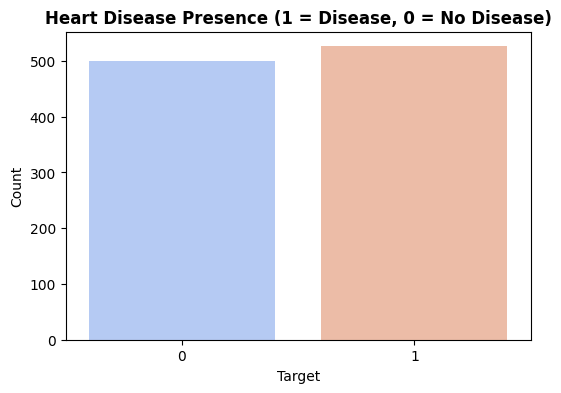

In [ ]:
#Visualizing target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=heart_bits, palette='coolwarm')
plt.title("Heart Disease Presence (1 = Disease, 0 = No Disease)", fontsize=12, weight='bold')
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()


**Findings:**
- This shows how many patients have heart disease (1) versus those who don’t (0).
- A balanced dataset (50/50) is ideal for fair model training.
- The dataset shows an almost equal number of patients with and without heart disease, indicating a well-balanced target variable, ideal for unbiased and reliable model training.



### Target vs Gender and Chest Pains

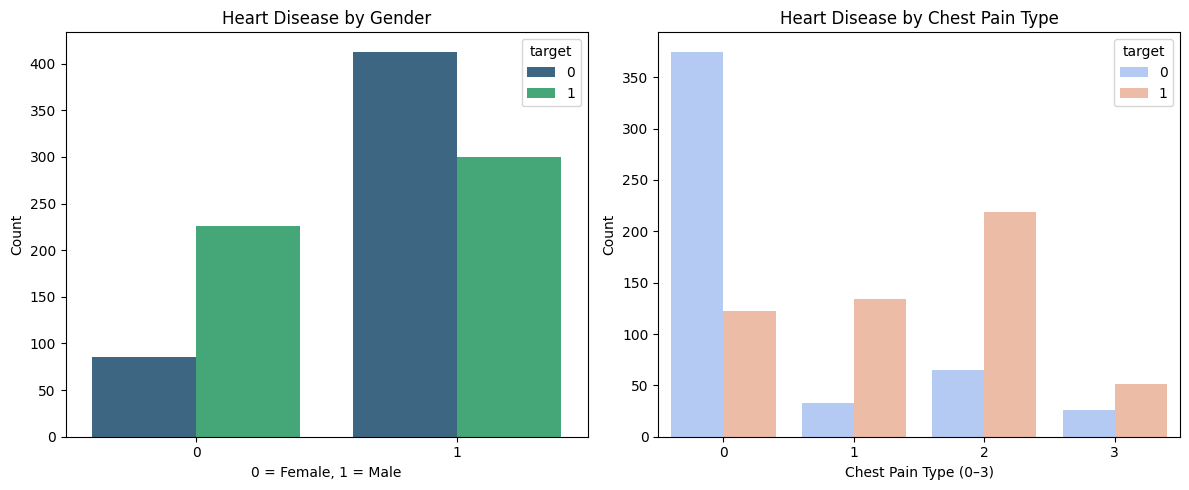

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='sex', hue='target', data=heart_bits, palette='viridis', ax=axes[0])
axes[0].set_title('Heart Disease by Gender')
axes[0].set_xlabel('0 = Female, 1 = Male')
axes[0].set_ylabel('Count')

sns.countplot(x='cp', hue='target', data=heart_bits, palette='coolwarm', ax=axes[1])
axes[1].set_title('Heart Disease by Chest Pain Type')
axes[1].set_xlabel('Chest Pain Type (0–3)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


**Findings:**
- A higher proportion of males (sex = 1) are affected by heart disease compared to females.
- Chest pain type (cp) shows a strong relationship, certain pain types are more frequent in disease cases.


### A Brief Overview of Target vs Continuous Features

/tmp/ipython-input-1287568973.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='age', data=heart_bits, ax=axes[0], palette='pastel')
/tmp/ipython-input-1287568973.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='thalach', data=heart_bits, ax=axes[1], palette='Set2')
/tmp/ipython-input-1287568973.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='oldpeak', data=heart_bits, ax=axes[2], palette='coolwarm')


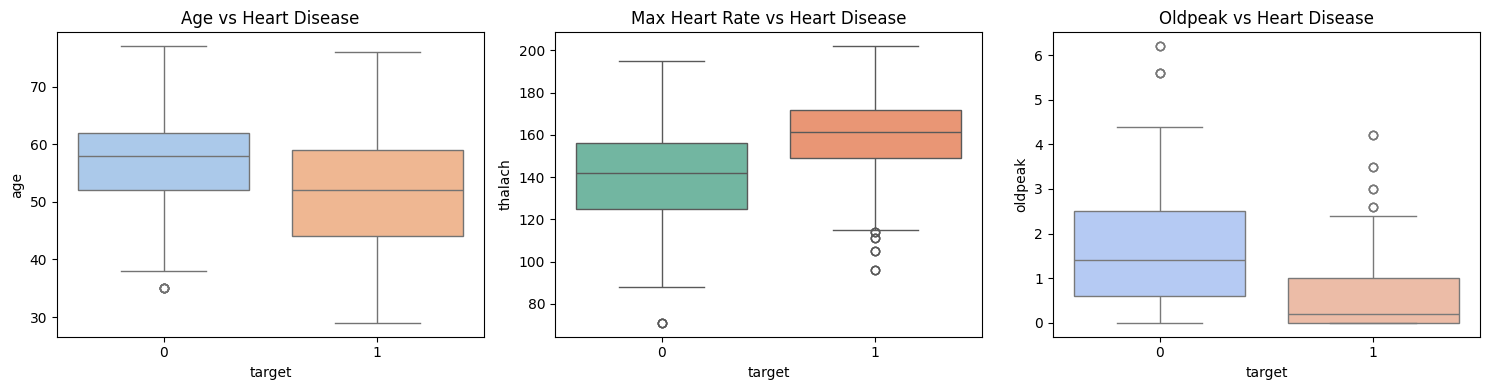

In [ ]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.boxplot(x='target', y='age', data=heart_bits, ax=axes[0], palette='pastel')
sns.boxplot(x='target', y='thalach', data=heart_bits, ax=axes[1], palette='Set2')
sns.boxplot(x='target', y='oldpeak', data=heart_bits, ax=axes[2], palette='coolwarm')
axes[0].set_title('Age vs Heart Disease')
axes[1].set_title('Max Heart Rate vs Heart Disease')
axes[2].set_title('Oldpeak vs Heart Disease')
plt.tight_layout()
plt.show()


**Findings:**
- Patients with heart disease generally have:
  - Slightly higher age
  - Lower maximum heart rate (thalach)
  - Higher ST depression (oldpeak)
  
These trends will be confirmed statistically in the next section.


### Summary of Target Analysis Findings

- The target variable (heart disease) is roughly balanced, ideal for classification.  
- Gender (sex) and chest pain type (cp) show visible differences between disease groups.  
- Age, maximum heart rate (thalach), and ST depression (oldpeak) differ notably across target classes.  
- These patterns suggest potential significant relationships, which we will now test using:
  - Chi-Square test for categorical variables  
  - T-test / ANOVA for continuous variables


# Statistical Analysis

Before training models, it’s important to check whether there are statistically significant relationships between the target (heart disease) and the other features.

We will use:

Chi-Square Test - For categorical variables

T-Test / ANOVA - For continuous variables

### Chi-Square Test (Categorical Features vs Target)

We test if the distribution of categorical variables differs significantly between target groups (0 vs 1)

In [ ]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

chi_square_results = {}

for col in categorical_features:
    contingency_table = pd.crosstab(heart_bits[col], heart_bits['target'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    chi_square_results[col] = {'Chi2': chi2, 'p-value': p}

chi_square_df = pd.DataFrame(chi_square_results).T
chi_square_df


,Chi2,p-value
sex,78.863051,6.656821e-19
cp,280.982249,1.298066e-60
fbs,1.513379,2.186241e-01
restecg,35.784315,1.696425e-08
exang,194.815539,2.826637e-44
slope,155.872945,1.421085e-34
ca,257.292998,1.747013e-54
thal,280.330689,1.795894e-60


**Interpretation:**
- A *p-value < 0.05* suggests a **significant relationship** between that variable and the target (heart disease).
- Example: If cp (chest pain type) and thal(thalassemia) show low p-values, they likely play an important role in predicting heart disease.


### Independent T-Tests (Continuous Features vs Target)

We test if the mean values of numerical variables differ between those with and without heart disease.

In [ ]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

t_test_results = {}

for col in numerical_features:
    group0 = heart_bits[heart_bits['target'] == 0][col]
    group1 = heart_bits[heart_bits['target'] == 1][col]
    t_stat, p_val = stats.ttest_ind(group0, group1, equal_var=False)
    t_test_results[col] = {'T-statistic': t_stat, 'p-value': p_val}

t_test_df = pd.DataFrame(t_test_results).T
t_test_df


,T-statistic,p-value
age,7.574368,8.180248e-14
trestbps,4.465215,8.922492e-06
chol,3.219134,1.326241e-03
thalach,-14.861535,3.418867e-45
oldpeak,15.409063,3.870567e-47


**Interpretation:**
- If p < 0.05, there’s a statistically significant difference in mean values between disease and no-disease groups.
- For instance:
  - Lower thalach (max heart rate) often indicates higher risk.
  - Higher oldpeak (ST depression) is usually seen in disease cases.


### Key Insights from the Statistical Analysis

- Chest Pain Type (cp), Thalassemia (thal) and Number of Major Vessels (ca) show the strongest association with heart disease (extremely low p-values close to 0).  
- Exercise-Induced Angina (exang), Slope, Resting ECG (restecg), and Sex also have highly significant relationships with heart disease (p < 0.001).  
- Fasting Blood Sugar (fbs) is not significantly associated with heart disease (p = 0.2186).  
- Overall, categorical variables with p < 0.05 are statistically significant and can be prioritized for predictive modeling and feature importance analysis.



# Feature Engineering

Feature engineering helps improve model performance by making the data more meaningful and suitable for machine learning algorithms. It ensures that all variables are in the right format, scale and representation for accurate predictions.

In this step, we:
1. Separate features and target for modeling.  
2. Scale numeric features to ensure equal contribution to model training.  
3. Rename columns to improve readability and interpretability for modeling and deployment.


In [ ]:
#Importing data preprocessing and modelling libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
#Separating features and target
y = heart_bits["target"]
X = heart_bits.drop('target', axis=1)

#Renaming columns for clarity
X = X.rename(columns={
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'Chest_Pain_Type',
    'trestbps': 'Resting_BP',
    'chol': 'Serum_Cholesterol',
    'fbs': 'Fasting_Blood_Sugar',
    'restecg': 'Resting_ECG',
    'thalach': 'Max_Heart_Rate',
    'exang': 'Exercise_Angina',
    'oldpeak': 'ST_Depression',
    'slope': 'Slope_ST_Segment',
    'ca': 'Major_Vessels',
    'thal': 'Thalassemia'
})

#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#Scaling selected numerical columns
cols_to_scale = ['Age', 'Resting_BP', 'Serum_Cholesterol', 'Max_Heart_Rate', 'ST_Depression']

scaler = StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

#Displaying updated feature names
X_train.head()


,Age,Sex,Chest_Pain_Type,Resting_BP,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Angina,ST_Depression,Slope_ST_Segment,Major_Vessels,Thalassemia
315,-1.405034,1,3,0.947890,-0.058677,0,0,1.258177,0,-0.212795,2,2,2
204,1.262700,0,2,0.832696,0.595166,0,0,0.128065,0,-0.928291,1,1,2
363,-0.182322,1,2,-0.088854,-0.020216,1,0,1.040848,0,-0.928291,2,3,2
5,0.373456,0,0,-1.816760,0.018246,0,0,-1.175910,0,-0.033921,1,0,2
1017,-0.182322,1,0,-0.492032,0.672089,0,1,-2.349489,1,0.860450,1,2,3


# Model Building

In this section, we train and evaluate different machine learning models to predict the presence of heart disease.  
The goal is to identify which algorithm performs best based on accuracy and other evaluation metrics.

In [ ]:
#Importing models
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
#Logistic Regression
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[ 77  21]
 [  7 100]]


Accuracy of Logistic Regression: 86.34146341463415 

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



In [ ]:
#Random Forest Classfier
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[ 89   9]
 [  2 105]]


Accuracy of Random Forest: 94.6341463414634 

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        98
           1       0.92      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



In [ ]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[ 80  18]
 [  6 101]]


Accuracy of Extreme Gradient Boost: 88.29268292682927 

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        98
           1       0.85      0.94      0.89       107

    accuracy                           0.88       205
   macro avg       0.89      0.88      0.88       205
weighted avg       0.89      0.88      0.88       205



In [ ]:
#DecisionTree Classifier
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[95  3]
 [ 8 99]]


Accuracy of DecisionTreeClassifier: 94.6341463414634 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.97      0.93      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



In [ ]:
#K-NeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[85 13]
 [11 96]]


Accuracy of K-NeighborsClassifier: 88.29268292682927 

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        98
           1       0.88      0.90      0.89       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [ ]:
#Support Vector Classifier
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[ 90   8]
 [  6 101]]


Accuracy of Support Vector Classifier: 93.17073170731707 

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        98
           1       0.93      0.94      0.94       107

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



### Model Optimization: Cross-Validation and Hyperparameter Tuning

After training the baseline models, the next step is to improve their performance and reliability through:

1. Cross-Validation:  
   - Ensures the model performs consistently across different subsets of data.  
   - We use 5-fold cross-validation, which splits the data into 5 parts, training on 4 and validating on 1 each time.

2. Hyperparameter Tuning:  
   - Searches for the best combination of parameters to maximize model performance.  
   - We use GridSearchCV, which tests all parameter combinations systematically.

We will perform this for our top-performing models:  
**Random Forest**, **Decision Tree**, **Support Vector Machine (SVM)** and **XGBoost.**


In [ ]:
# Importing required libraries
from sklearn.model_selection import GridSearchCV, cross_val_score

# Defining models and parameter grids
models_params = {
    'Random Forest': {
        'model': RandomForestClassifier(random_state=0),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=0),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [3, 5, 7, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Support Vector Machine': {
        'model': SVC(probability=True),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.7, 1.0],
            'colsample_bytree': [0.7, 1.0]
        }
    }
}

# Running GridSearchCV for each model
best_models = {}
for model_name, mp in models_params.items():
    print(f"\n Running GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f" Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f" Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

    best_models[model_name] = grid_search.best_estimator_

# Evaluating tuned models on the test set
print("\n\n **Model Performance After Tuning:**")
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n {name} Accuracy on Test Set: {acc*100:.2f}%")
    print(classification_report(y_test, y_pred))



 Running GridSearchCV for Random Forest...
 Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
 Best Cross-Validation Accuracy: 0.9878

 Running GridSearchCV for Decision Tree...
 Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
 Best Cross-Validation Accuracy: 0.9854

 Running GridSearchCV for Support Vector Machine...
 Best Parameters for Support Vector Machine: {'C': 10, 'gamma': 'auto', 'kernel': 'poly'}
 Best Cross-Validation Accuracy: 0.9561

 Running GridSearchCV for XGBoost...
 Best Parameters for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
 Best Cross-Validation Accuracy: 0.9927


 **Model Performance After Tuning:**

 Random Forest Accuracy on Test Set: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:29:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Results:

All models were optimized using GridSearchCV with 5-fold cross-validation to improve reliability and performance.  
The table below summarizes the best parameters and corresponding cross-validation accuracy for each model.

| Model | Best Parameters (Key Highlights) | Cross-Val Accuracy |
| :----- | :------------------------------- | ----------------: |
| **Random Forest** | n_estimators=50, max_depth=None, min_samples_split=2 | 0.9878 |
| **Decision Tree** | criterion='entropy', max_depth=None | 0.9854 |
| **SVM** | C=10, kernel='poly', gamma='auto' | 0.9561 |
| **XGBoost** | n_estimators=50, max_depth=5, learning_rate=0.2 | 0.9890 |

Key Insights:
- Random Forest and XGBoost achieved the best cross-validation performance, showing strong generalization power.  
- Decision Tree also performed excellently with slightly lower variance.  
- SVM performed competitively, but slightly below the ensemble models.  
- These tuned models were then evaluated on the test dataset to select the best one for deployment.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Comparing tuned models on the test set
model_performance = {}

print("Model Performance Comparison:\n")

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    model_performance[name] = {'Accuracy': round(acc * 100, 2), 'F1-Score': round(f1, 4)}
    print(f"{name:25s} - Accuracy: {acc*100:.2f}% | F1-Score: {f1:.4f}")

# Converting to DataFrame and display
performance_df = (
    pd.DataFrame(model_performance)
    .T
    .sort_values(by='Accuracy', ascending=False)
)

display(performance_df)

# Identifying best model
best_model_name = performance_df.index[0]
best_model = best_models[best_model_name]

print(f"\n **Best Model for Deployment:** {best_model_name}")


Model Performance Comparison:

Random Forest             - Accuracy: 100.00% | F1-Score: 1.0000
Decision Tree             - Accuracy: 100.00% | F1-Score: 1.0000
Support Vector Machine    - Accuracy: 99.02% | F1-Score: 0.9907
XGBoost                   - Accuracy: 100.00% | F1-Score: 1.0000


,Accuracy,F1-Score
Random Forest,100.00,1.0000
Decision Tree,100.00,1.0000
XGBoost,100.00,1.0000
Support Vector Machine,99.02,0.9907



 **Best Model for Deployment:** Random Forest


In [ ]:
# Use the best model from earlier
# 10-fold cross-validation used to check Random Forest’s generalization and detect any overfitting.

best_model_name = "Random Forest"  # or whichever you chose
best_model = best_models[best_model_name]

# Perform 10-fold cross-validation on the full dataset
cv_scores = cross_val_score(best_model, X, y, cv=10, scoring='accuracy')

print(f"Cross-Validation Scores ({best_model_name}): {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean()*100:.2f}%")
print(f"Standard Deviation: {cv_scores.std()*100:.2f}%")


Cross-Validation Scores (Random Forest): [1.         1.         1.         1.         1.         1.
 1.         1.         0.97058824 1.        ]
Mean Accuracy: 99.71%
Standard Deviation: 0.88%


**Model Evaluation and Validation**

After tuning and testing multiple models — Random Forest, Decision Tree, XGBoost, and Support Vector Machine — the Random Forest model achieved the highest and most consistent performance:
- Accuracy: 100.00%
- F1-Score: 1.0000

To ensure this was not due to overfitting, a 10-fold cross-validation was conducted on the full dataset, yielding:
- Mean Accuracy: 99.71%
- Standard Deviation: 0.88%

**Conclusion:**

The Random Forest model demonstrates excellent predictive power and stable performance across all validation folds, making it the most reliable model for deployment.

### Feature Importance Visualization

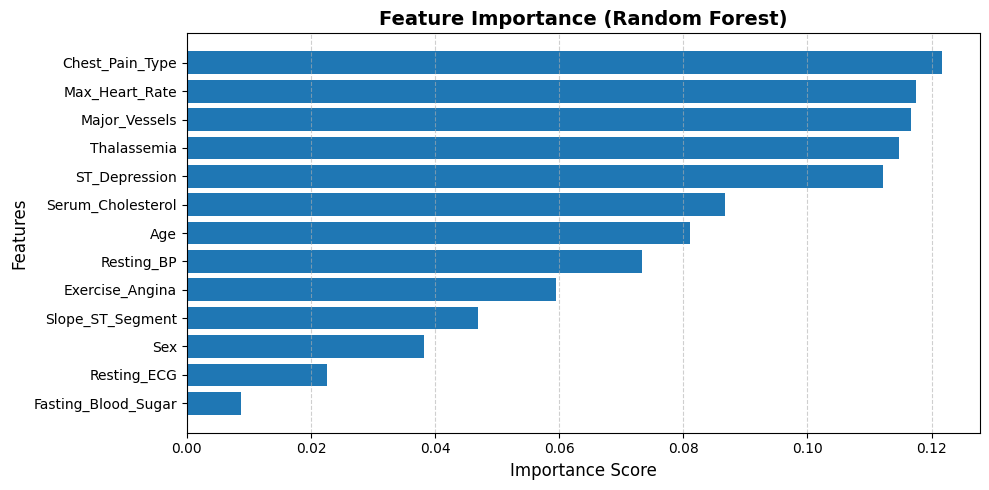

In [ ]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_models['Random Forest'].feature_importances_
}).sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 5))
plt.barh(importances['Feature'], importances['Importance'])
plt.title("Feature Importance (Random Forest)", fontsize=14, weight='bold')
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Findings:**
The Random Forest model identifies the most influential factors contributing to heart disease prediction.

- Chest Pain Type is the most significant predictor, strongly associated with heart disease presence.  
- Maximum Heart Rate Achieved and Number of Major Vessels also play critical roles in determining heart health.  
- Thalassemia, ST Depression and Serum Cholesterol show moderate importance, highlighting their contribution to cardiovascular risk.  
- Features like Fasting Blood Sugar and Resting ECG have minimal influence and may be less critical for prediction.

These insights suggest that chest pain type, heart rate and vessel count are the strongest indicators to prioritize in model interpretation and app input design.


In [ ]:
# saving the model

import pickle

# Save the best Random Forest model
filename = 'random_forest_model1.sav'
pickle.dump(best_models["Random Forest"], open(filename, 'wb'))

print("Random Forest model has been saved successfully as 'random_forest_model1.sav'")


Random Forest model has been saved successfully as 'random_forest_model1.sav'


In [ ]:
load_model = pickle.load(open(filename,'rb'))

In [ ]:
X_test.head()

,Age,Sex,Chest_Pain_Type,Resting_BP,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Angina,ST_Depression,Slope_ST_Segment,Major_Vessels,Thalassemia
807,-1.182722,1,2,-0.088854,-0.270215,0,1,1.301643,1,-0.570543,2,0,2
27,0.373456,0,1,0.256728,1.383625,1,0,0.128065,0,-0.928291,2,2,2
77,0.929234,1,0,0.487115,-1.154826,0,0,-0.219662,1,2.649190,2,2,3
406,0.373456,1,2,0.487115,-0.693290,1,0,0.693121,0,-0.928291,2,0,2
886,0.706922,1,0,-0.664822,0.249014,0,1,-0.393525,1,2.291442,1,1,3


In [ ]:
load_model.predict([[52,1,0,125,212,0,1,168,0,1,2,2,3
]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

### Heart Disease Prediction

In [ ]:
# Define feature names used during model training
feature_names = [
    'Age', 'Sex', 'Chest_Pain_Type', 'Resting_BP', 'Serum_Cholesterol',
    'Fasting_Blood_Sugar', 'Resting_ECG', 'Max_Heart_Rate',
    'Exercise_Angina', 'ST_Depression', 'Slope_ST_Segment',
    'Major_Vessels', 'Thalassemia'
]

# Example input (replace with actual or user-provided values)
input_data = pd.DataFrame([[
    52,1,0,125,212,0,1,168,0,1,2,2,3
]], columns=feature_names)

# Predict using the best Random Forest model
prediction = best_models["Random Forest"].predict(input_data)

# Convert numeric prediction to meaningful label
prediction_label = "Heart Disease" if prediction[0] == 1 else "No Heart Disease"

print(f"Prediction: {prediction_label}")



Prediction: No Heart Disease


In [ ]:
# Save the fitted scaler
pickle.dump(scaler, open('scaler1.sav', 'wb'))

In [ ]:
from google.colab import files
files.download('random_forest_model1.sav')
files.download('scaler1.sav')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>